# PAP2 V256: Röntgenfluoreszenz

Erstellen Sie mit der Software Origin eine Arbeitsmappe die folgende Spalten besitzt:
- Kernladungszahl Z (x- Zuordnung).
- Energie der Kα- Strahlung Eα (y- Zuordnung).
- Peakbreite der Kα- Strahlung (y- Fehler Zuordnung). 
- Die Größe √Eα und dessen Fehler.

Tragen Sie √Eα mit Fehlern grafisch u ̈ber Z auf und passen Sie die Funktion √E =√E (Z−σ )  1 − 1  an.Fu ̈rn undn müsse nSi edie
α R 12 n2 n2 1 2 12
passenden Hauptquantenzahlen wa ̈hlen. ER und σ12 sind freie Fitparameter. Vergleichen Sie die bestimmten Fitparametern mit dem Literaturwert bzw. Ih- ren Erwartungen. Wiederholen Sie die Auswertung fu ̈r die Kβ- Strahlung.

- k alpha = 1
- k beta = 1.8

[ 1.56605527  0.01424208]
[  6.81789452e-02   5.97518489e-05]


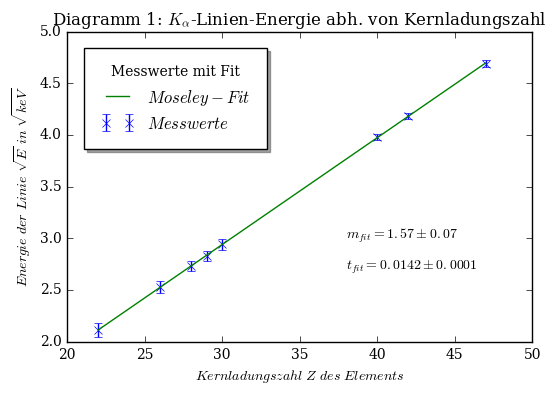

In [19]:
#Aufgabe 1: Auswertung k_alpha-Strahlung: 

#Import der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Einlesen der Daten in folgender Reihenfolge:
Z, Ea, sEa, sqEa, dsqEa = np.loadtxt('tab1.txt', skiprows=3, usecols=(1,2,3,4,5), unpack=True)
#Kernladungszahl Z
#Energie der K_alpha-Strahlung Ea
#Peakbreite der Ka Strahlung sEa
#Wurzel aus Ea: sqEa
#Fehler der Wurzel: dsqEa

# Z: [ 22.  26.  28.  29.  30.  40.  42.  47.]
# Ea: [  4.47   6.4    7.49   8.06   8.65  15.81  17.48  21.99]
# sEa: [ 0.29  0.28  0.26  0.26  0.26  0.26  0.25  0.25]
# sqEa: [ 2.11  2.53  2.73  2.83  2.94  3.98  4.18  4.69]
# dsqEa: [ 0.07  0.06  0.05  0.05  0.05  0.03  0.03  0.03]


#Fitfunktion: Moseleyesches Gesetz (wie in Einleitung vereinfacht)
def moseley(z, sigma, E): 
    return np.sqrt(E)*(z - sigma)*np.sqrt(3/4)

#Fit durchführen
popt, pcov = curve_fit(moseley, Z, sqEa, p0=[1.6, 0.01], maxfev=5000)

print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.errorbar(Z, sqEa, yerr=dsqEa, linestyle='None', marker='x', label='$Messwerte$')
plt.plot(Z, moseley(Z, *popt), label='$Moseley-Fit$')
plt.xlabel('$Kernladungszahl\ Z\ des\ Elements$')
plt.ylabel('$Energie\ der\ Linie\ \sqrt{E} \ in\ \sqrt{keV}$')
plt.title('Diagramm 1: $K_{\\alpha}$-Linien-Energie abh. von Kernladungszahl')
plt.legend(loc='best')
plt.axis((20, 50, 2, 5))
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true')
plt.text(38, 3, u'$m_{fit}=%.2f \pm%.2f$' %(popt[0], perr[0]), fontsize=10)
plt.text(38, 2.7, u'$t_{fit}=%.4f \pm%.4f$' %(popt[1], perr[1]), fontsize=10)

plt.savefig('v256_1.pdf',format='pdf')

[ 28.  29.  30.  40.  42.  47.] [  8.16   8.87   9.55  17.29  19.62  24.73] [ 0.31  0.27  0.31  0.29  0.29  0.29] [ 2.86  2.98  3.09  4.16  4.43  4.97] [ 0.05  0.04  0.05  0.03  0.03  0.03]
[ 2.10605639  0.01375893]
[  3.23531130e-01   2.56740492e-04]


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt


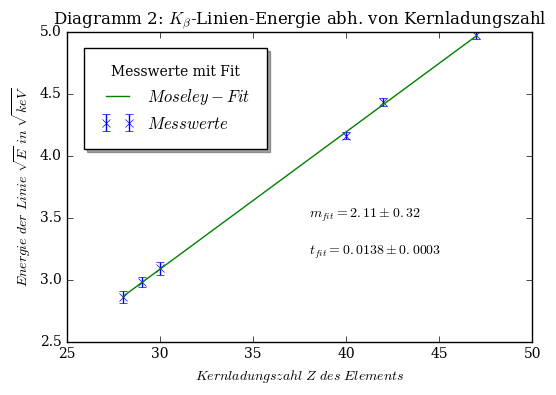

In [16]:
#Aufgabe 2: Auswertung k_beta-Strahlung: 

#Import der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Einlesen der Daten in folgender Reihenfolge:
Z, Eb, sEb, sqEb, dsqEb = np.loadtxt('tab1.txt', skiprows=5, usecols=(1,6,7,8,9), unpack=True)
#Kernladungszahl Z
#Energie der K_beta-Strahlung Eb
#Peakbreite der Kb Strahlung sEb
#Wurzel aus Eb: sqEb
#Fehler der Wurzel: dsqEb

print (Z, Eb, sEb, sqEb, dsqEb)


#Fitfunktion: Moseleyesches Gesetz (wie in Einleitung vereinfacht)
def moseley2(z, sigma, E): 
    return np.sqrt(E)*(z - sigma)*np.sqrt(8/9)

#Fit durchführen
popt, pcov = curve_fit(moseley2, Z, sqEb, p0=[0.1, 1.7], maxfev=5000)

print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.errorbar(Z, sqEb, yerr=dsqEb, linestyle='None', marker='x', label='$Messwerte$')
plt.plot(Z, moseley2(Z, *popt), label='$Moseley-Fit$')
plt.xlabel('$Kernladungszahl\ Z\ des\ Elements$')
plt.ylabel('$Energie\ der\ Linie\ \sqrt{E} \ in\ \sqrt{keV}$')
plt.title('Diagramm 2: $K_{\\beta}$-Linien-Energie abh. von Kernladungszahl')
plt.legend(loc='best')
#plt.axis((20, 50, 2, 5))
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true')
plt.text(38, 3.5, u'$m_{fit}=%.2f \pm%.2f$' %(popt[0], perr[0]), fontsize=10)
plt.text(38, 3.2, u'$t_{fit}=%.4f \pm%.4f$' %(popt[1], perr[1]), fontsize=10)

plt.savefig('v256_2.pdf',format='pdf')